In [1]:
#Motivation: https://github.com/rslim087a/PyTorch-for-Deep-Learning-and-Computer-Vision-Course-All-Codes-
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from IPython import display

In [2]:
# https://www.sharetechnote.com/html/Python_PyTorch_nn_Linear_01.html
m = nn.Linear(3, 1)
[weights] = m.state_dict()['weight']
[bias] = m.state_dict()['bias']
print(weights, bias)
[input] = torch.randn(1, 3)
print(input)
output = m(input)
print(output)

tensor([-0.3303,  0.2378, -0.5417]) tensor(0.1529)
tensor([ 0.6921,  0.8160, -0.1096])
tensor([0.1778], grad_fn=<ViewBackward0>)


In [3]:
print(np.dot(input, weights) + bias)

tensor(0.1778)


C:\Users\jvjamesx\AppData\Local\Temp\ipykernel_29604\2688638405.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  print(np.dot(input, weights) + bias)


In [4]:
x = torch.tensor([2.0, 3.0])

class Linear_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.lm1 = nn.Linear(2, 2, bias=False)
        self.lm2 = nn.Linear(2, 1, bias=True)

    def forward(self, X):
        out = self.lm1(X) + self.lm2(X)
        return out

mdl = Linear_Model()

print(mdl(x))

tensor([0.4446, 0.4029], grad_fn=<AddBackward0>)


Text(0.5, 0, 'X')

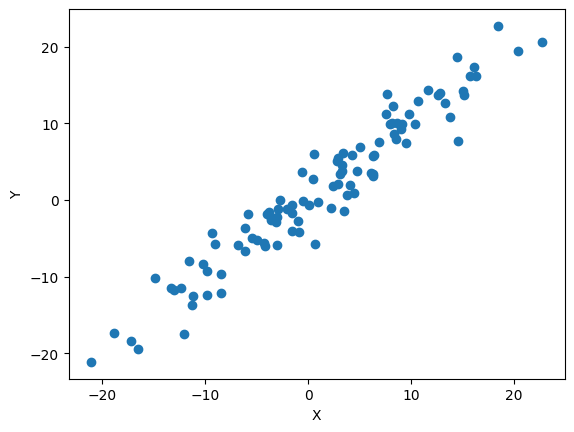

In [5]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X, y, 'o')
plt.ylabel('Y')
plt.xlabel('X')

In [6]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [7]:
torch.manual_seed(1)
model = LR(1, 1)

In [8]:
[w, b] = model.parameters()
def get_params():
    return (w[0][0].item(), b[0].item())

In [9]:
def plot_fit(title):
    plt.title(title)
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()
    display.clear_output(wait=True)

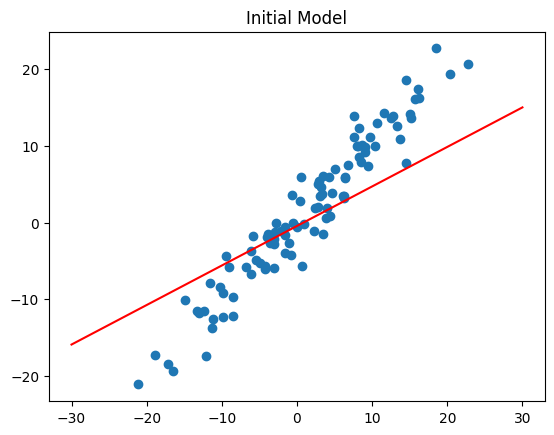

In [10]:
plot_fit('Initial Model')

In [11]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

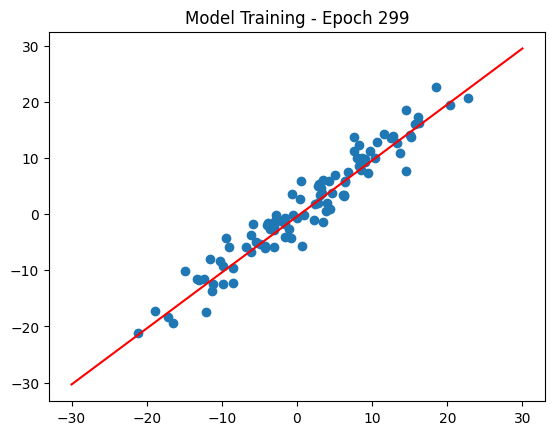

In [12]:
epochs = 300
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    #print("epochs: ", i, " loss: ", loss)
    plot_fit('Model Training - Epoch {}'.format(i))
    
    losses.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Text(0, 0.5, 'loss')

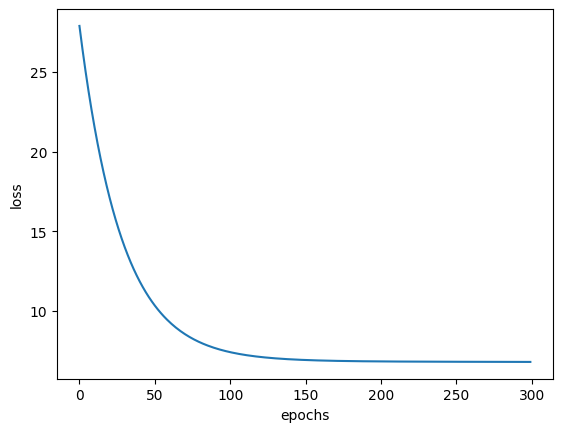

In [13]:
plt.plot(range(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')

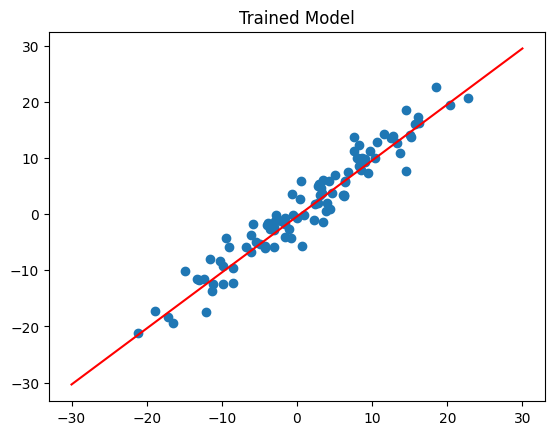

In [14]:
plot_fit('Trained Model')